Starting with the Cleaning 

In [1]:
import pandas as pd
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
file_path = "tickets_classification_eng.json"

with open(file_path, "r") as file:
    datos = json.load(file)

data = pd.json_normalize(datos)

In [3]:
data = data[['_source.complaint_what_happened', 
             '_source.product', 
             '_source.sub_product']]

In [4]:
data = data.rename(columns={
    '_source.complaint_what_happened': 'complaint_what_happened',
    '_source.product': 'category',
    '_source.sub_product': 'sub_product'
})


In [5]:
data.head(5)

,complaint_what_happened,category,sub_product
0,,Debt collection,Credit card debt
1,Good morning my name is XXXX XXXX and I apprec...,Debt collection,Credit card debt
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card,General-purpose credit card or charge card
3,,Mortgage,Conventional home mortgage
4,,Credit card or prepaid card,General-purpose credit card or charge card


In [6]:
data['ticket_classification'] = data['category'] + ' + ' + data['sub_product']

In [7]:
data

,complaint_what_happened,category,sub_product,ticket_classification
0,,Debt collection,Credit card debt,Debt collection + Credit card debt
1,Good morning my name is XXXX XXXX and I apprec...,Debt collection,Credit card debt,Debt collection + Credit card debt
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card,General-purpose credit card or charge card,Credit card or prepaid card + General-purpose ...
3,,Mortgage,Conventional home mortgage,Mortgage + Conventional home mortgage
4,,Credit card or prepaid card,General-purpose credit card or charge card,Credit card or prepaid card + General-purpose ...
...,...,...,...,...
78308,,Checking or savings account,Checking account,Checking or savings account + Checking account
78309,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",Credit card or prepaid card,General-purpose credit card or charge card,Credit card or prepaid card + General-purpose ...
78310,I am not familiar with XXXX pay and did not un...,Checking or savings account,Checking account,Checking or savings account + Checking account
78311,I have had flawless credit for 30 yrs. I've ha...,Credit card or prepaid card,General-purpose credit card or charge card,Credit card or prepaid card + General-purpose ...


In [8]:
#eliminar columnas
data = data.drop(columns=['category', 'sub_product'])

In [9]:
#ramplazar vacios por nan 
data['complaint_what_happened'] = data['complaint_what_happened'].replace('', np.nan)


In [10]:
data

,complaint_what_happened,ticket_classification
0,NaN,Debt collection + Credit card debt
1,Good morning my name is XXXX XXXX and I apprec...,Debt collection + Credit card debt
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card + General-purpose ...
3,NaN,Mortgage + Conventional home mortgage
4,NaN,Credit card or prepaid card + General-purpose ...
...,...,...
78308,NaN,Checking or savings account + Checking account
78309,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",Credit card or prepaid card + General-purpose ...
78310,I am not familiar with XXXX pay and did not un...,Checking or savings account + Checking account
78311,I have had flawless credit for 30 yrs. I've ha...,Credit card or prepaid card + General-purpose ...


In [11]:
#eliminar filas que tengan faltantes
data = data.dropna(subset=['complaint_what_happened', 'ticket_classification'])

In [12]:
#reiniciar indice
data = data.reset_index(drop=True)

In [13]:
data.head(5)

,complaint_what_happened,ticket_classification
0,Good morning my name is XXXX XXXX and I apprec...,Debt collection + Credit card debt
1,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card + General-purpose ...
2,Chase Card was reported on XX/XX/2019. However...,"Credit reporting, credit repair services, or o..."
3,"On XX/XX/2018, while trying to book a XXXX XX...","Credit reporting, credit repair services, or o..."
4,my grand son give me check for {$1600.00} i de...,Checking or savings account + Checking account


# EDA

In [14]:
data.head()

,complaint_what_happened,ticket_classification
0,Good morning my name is XXXX XXXX and I apprec...,Debt collection + Credit card debt
1,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card + General-purpose ...
2,Chase Card was reported on XX/XX/2019. However...,"Credit reporting, credit repair services, or o..."
3,"On XX/XX/2018, while trying to book a XXXX XX...","Credit reporting, credit repair services, or o..."
4,my grand son give me check for {$1600.00} i de...,Checking or savings account + Checking account


In [15]:
#ver tamaño del data frame
data.shape[0] #filas

18963

In [16]:
data.shape[1] #columnas

2

In [17]:
# Valores uncios
data.nunique()

complaint_what_happened    18824
ticket_classification         78
dtype: int64

In [18]:
#hay nulos?
data.isnull().sum()

complaint_what_happened    0
ticket_classification      0
dtype: int64

In [19]:
#  valores únicos hay en 'ticket_classification'
data['ticket_classification'].value_counts()


ticket_classification
Credit card or prepaid card + General-purpose credit card or charge card                           4918
Checking or savings account + Checking account                                                     3788
Credit reporting, credit repair services, or other personal consumer reports + Credit reporting    2011
Bank account or service + Checking account                                                         1242
Mortgage + Conventional home mortgage                                                               955
                                                                                                   ... 
Prepaid card + Other special purpose card                                                             1
Checking or savings account + Personal line of credit                                                 1
Prepaid card + Electronic Benefit Transfer / EBT card                                                 1
Debt collection + Payday loan             

Hay 78 clases y hay unas que solo aparecen una vez

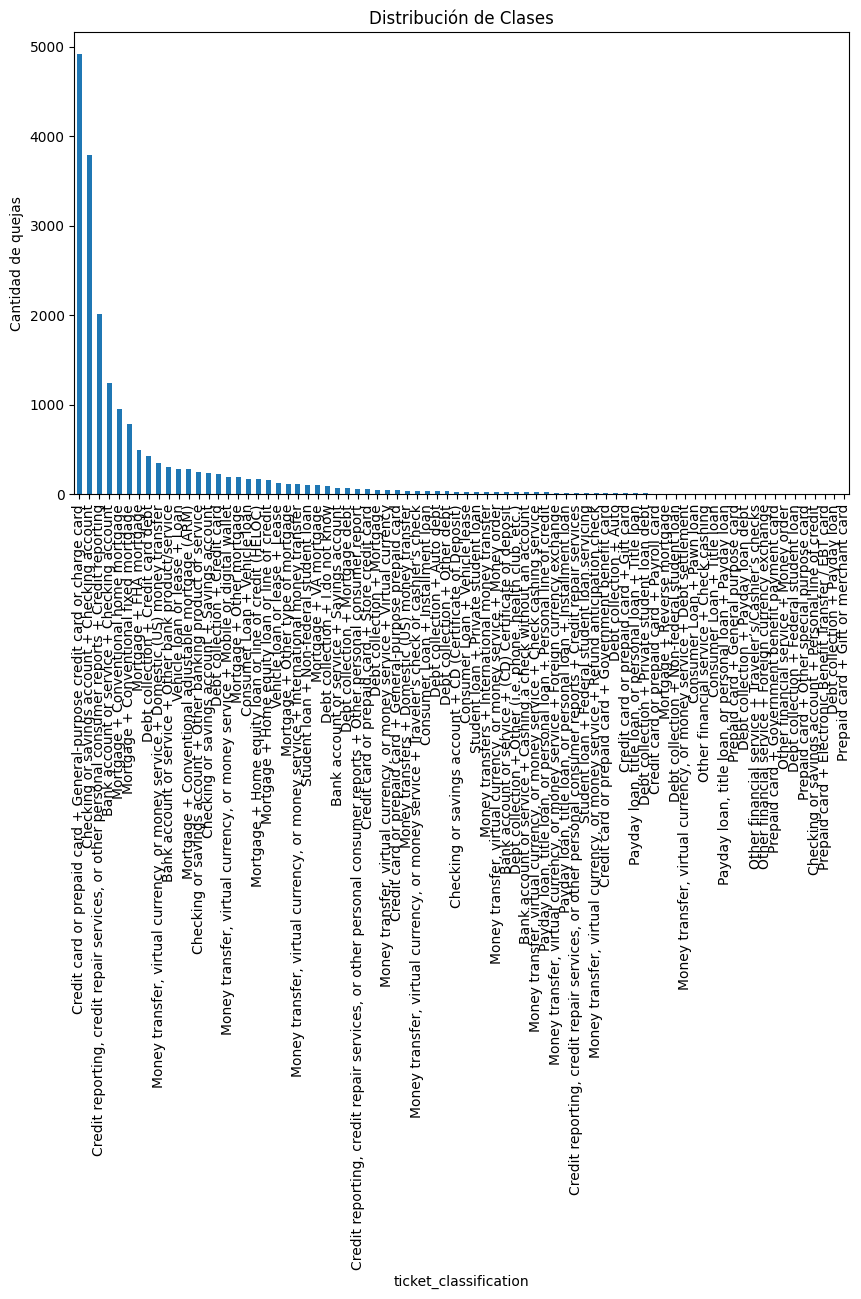

In [20]:
# Ver la distribución de las clases
class_counts = data['ticket_classification'].value_counts()
class_counts.plot(kind='bar', figsize=(10,6))
plt.title('Distribución de Clases')
plt.ylabel('Cantidad de quejas')
plt.show()


Eliminar las que tengas menos de 5 values. Para quitar el desbalanceo.

In [21]:
class_counts = data["ticket_classification"].value_counts()

In [22]:
classes_to_keep = class_counts[class_counts > 1].index
df_filtered = data[data["ticket_classification"].isin(classes_to_keep)]

print(f"Número de clases después de filtrar: {len(df_filtered['ticket_classification'].unique())}")

Número de clases después de filtrar: 71


In [23]:

rare_threshold = 5  # clases con menos de 5 instancias

# Agrupar las clases raras en una nueva categoría
data["ticket_classification"] = data["ticket_classification"].apply(
    lambda x: x if class_counts[x] > rare_threshold else "Otros"
)

print(data["ticket_classification"].value_counts())


ticket_classification
Credit card or prepaid card + General-purpose credit card or charge card                                         4918
Checking or savings account + Checking account                                                                   3788
Credit reporting, credit repair services, or other personal consumer reports + Credit reporting                  2011
Bank account or service + Checking account                                                                       1242
Mortgage + Conventional home mortgage                                                                             955
Mortgage + Conventional fixed mortgage                                                                            785
Mortgage + FHA mortgage                                                                                           496
Debt collection + Credit card debt                                                                                427
Money transfer, virtual currency, 

In [24]:
current_dir = os.getcwd()

output_dir = os.path.join(os.path.dirname(current_dir), 'clean')  # Esto sube un nivel y crea 'data'

# Crear la carpeta 'data' si no existe
os.makedirs(output_dir, exist_ok=True)

file_path = os.path.join(output_dir, 'ticket_cleaned.csv')

data.to_csv(file_path, index=False)